# Загрузка данных о цене акции Apple

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import yfinance as yf

data = yf.download("AAPL", period="6mo")

[*********************100%%**********************]  1 of 1 completed


# Рассчитываем простое скользящее среднее (SMA) за 10 дней

In [3]:
period = 10

data['SMA'] = data['Close'].rolling(window=period).mean()

# Создаем колонку для целевой переменной (значение, которое нужно предсказать)
# Например, предсказываем цену закрытия через 5 дней

In [4]:
forecast_out = 5
data['Prediction'] = data['Close'].shift(-forecast_out)

# Удаляем строки с отсутствующими значениями

In [5]:
data.dropna(inplace=True)

# Определяем наборы данных для обучения и тестирования модели

In [6]:
X = np.array(data[['Close', 'SMA']])
y = np.array(data['Prediction'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Обучаем модель линейной регрессии

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Проверяем точность модели на тестовых данных

In [8]:
print(f'MSE модели: {mse(y_test, model.predict(X_test))}')

MSE модели: 32.95284461001142


# Делаем предсказание для последних значений данных

In [9]:
last_data = np.array(data.tail(1)[['Close', 'SMA']])
forecast = model.predict(last_data)
print(f'Предсказанная цена через {forecast_out} дней: {forecast[0]}')

Предсказанная цена через 5 дней: 187.72674544899684


In [10]:
data['Forecast'] = model.predict(np.array(data[['Close', 'SMA']]))

# Визуализируем результаты

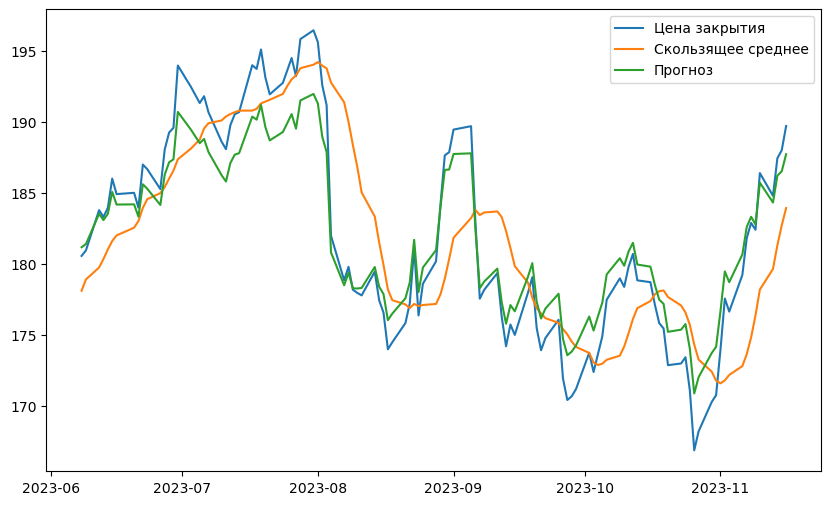

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Цена закрытия')
plt.plot(data['SMA'], label='Скользящее среднее')
plt.plot(data['Forecast'], label='Прогноз')
plt.legend()
plt.show()

# Подбор параметров

In [17]:
periods = [2, 5, 10, 15, 20, 25]

for period in periods:
    
    data = yf.download("AAPL", period="6mo")
    data['SMA'] = data['Close'].rolling(window=period).mean()
    
    forecast_out = 5
    data['Prediction'] = data['Close'].shift(-forecast_out)
    
    data.dropna(inplace=True)
    
    X = np.array(data[['Close', 'SMA']])
    y = np.array(data['Prediction'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f'MSE модели с периодом {period}: {mse(y_test, model.predict(X_test))}')

[*********************100%%**********************]  1 of 1 completed
MSE модели с периодом 2: 33.883297066575054
[*********************100%%**********************]  1 of 1 completed
MSE модели с периодом 5: 32.34297871254619
[*********************100%%**********************]  1 of 1 completed
MSE модели с периодом 10: 32.95284461001142
[*********************100%%**********************]  1 of 1 completed
MSE модели с периодом 15: 36.39310339617767
[*********************100%%**********************]  1 of 1 completed
MSE модели с периодом 20: 44.366844806371155
[*********************100%%**********************]  1 of 1 completed
MSE модели с периодом 25: 58.214458147983315
